# <mark> Install Libraries

In [20]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import random
import pandas as pd
import seaborn as sns

# <mark> KIIT-MiTA Dataset Exploration

In [10]:
# -----------------------------
# 1️⃣ Setup Dataset Paths
# -----------------------------
base_path = Path("/kaggle/input/kiit-mita/KIIT-MiTA")

train_images = base_path / "train/images"
train_labels = base_path / "train/labels"

valid_images = base_path / "valid/images"
valid_labels = base_path / "valid/labels"

test_images = base_path / "test/images"
test_labels = base_path / "test/labels"

folders = {
    "Train": train_images,
    "Validation": valid_images,
    "Test": test_images
}

print("Dataset directories:")
for name, path in folders.items():
    print(f"{name} images: {path}")
    label_path = path.parent / "labels"
    print(f"{name} labels: {label_path}")

Dataset directories:
Train images: /kaggle/input/kiit-mita/KIIT-MiTA/train/images
Train labels: /kaggle/input/kiit-mita/KIIT-MiTA/train/labels
Validation images: /kaggle/input/kiit-mita/KIIT-MiTA/valid/images
Validation labels: /kaggle/input/kiit-mita/KIIT-MiTA/valid/labels
Test images: /kaggle/input/kiit-mita/KIIT-MiTA/test/images
Test labels: /kaggle/input/kiit-mita/KIIT-MiTA/test/labels


In [12]:
# -----------------------------
# 2️⃣ Count Images per Folder
# -----------------------------
def count_images(folder):
    return len(list(folder.glob("*.jpeg")))

print("\nNumber of images per folder:")
for name, path in folders.items():
    print(f"{name}: {count_images(path)} images")


Number of images per folder:
Train: 1360 images
Validation: 170 images
Test: 170 images



Random training images:


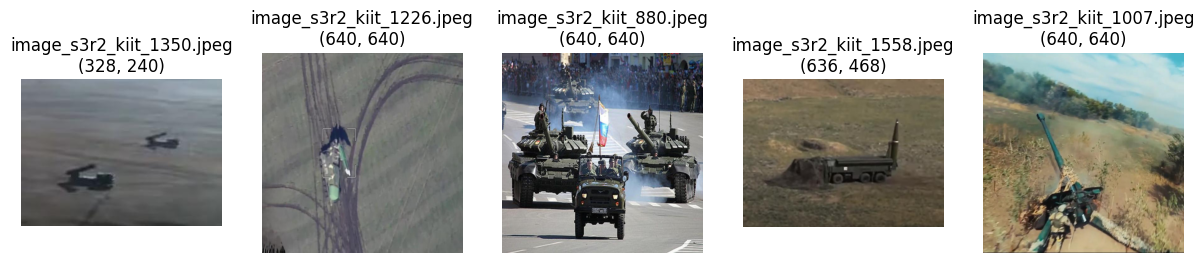

In [14]:
# -----------------------------
# 3️⃣ Preview Some Images
# -----------------------------
def show_random_images(folder, n=5):
    imgs = list(folder.glob("*.jpeg"))
    if len(imgs) == 0:
        print(f"No images found in {folder}")
        return
    n_samples = min(n, len(imgs))  # pick max available images
    selected = random.sample(imgs, n_samples)
    
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(selected):
        img = Image.open(img_path)
        plt.subplot(1, n_samples, i+1)
        plt.imshow(img)
        plt.title(f"{img_path.name}\n{img.size}")
        plt.axis("off")
    plt.show()

print("\nRandom training images:")
show_random_images(train_images, n=5)

In [15]:
# -----------------------------
# 4️⃣ Check Label Files
# -----------------------------
def show_label_file(label_file):
    with open(label_file, "r") as f:
        lines = f.readlines()
    print(f"\nLabel file: {label_file.name}")
    for line in lines[:5]:
        print(line.strip())
    if len(lines) > 5:
        print(f"... total {len(lines)} objects in this file")

# Show one random label from training set
train_label_files = list(train_labels.glob("*.txt"))
if train_label_files:
    random_label = random.choice(train_label_files)
    show_label_file(random_label)
else:
    print("No label files found in training folder.")


Label file: image_s3r2_kiit_1477.txt
6 0.511641 0.757266 0.057031 0.109844


In [17]:
# -----------------------------
# 5️⃣ Dataset Image Size Summary
# -----------------------------
print("\nImage size summary:")
for name, folder in folders.items():
    images = list(folder.glob("*.jpeg"))
    if len(images) == 0:
        continue
    sizes = [Image.open(img).size for img in images]
    widths, heights = zip(*sizes)
    print(f"{name}:")
    print(f" - Number of images: {len(images)}")
    print(f" - Width: min {min(widths)}, max {max(widths)}, mean {sum(widths)//len(widths)}")
    print(f" - Height: min {min(heights)}, max {max(heights)}, mean {sum(heights)//len(heights)}")




Image size summary:
Train:
 - Number of images: 1360
 - Width: min 183, max 3469, mean 789
 - Height: min 147, max 2602, mean 610
Validation:
 - Number of images: 170
 - Width: min 275, max 3872, mean 793
 - Height: min 168, max 2592, mean 618
Test:
 - Number of images: 170
 - Width: min 202, max 4252, mean 810
 - Height: min 168, max 2828, mean 632


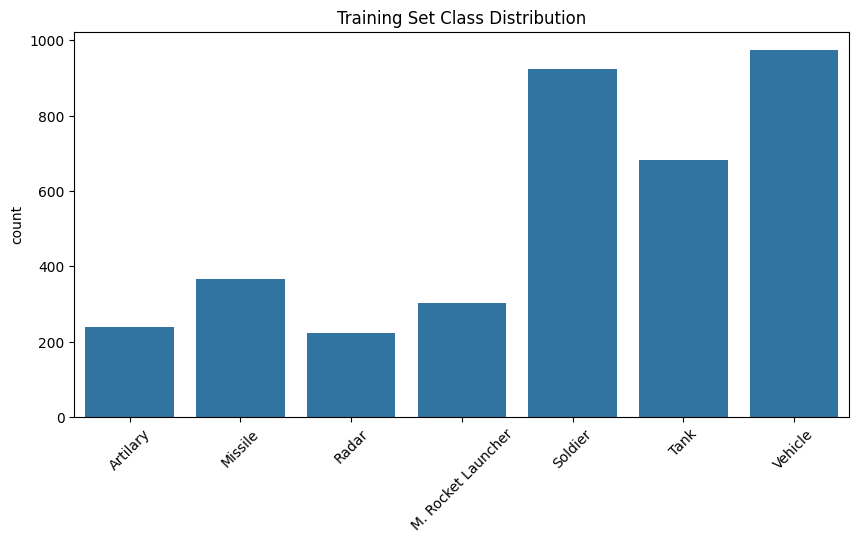

In [21]:
# -----------------------------
# 6️⃣ Class Distribution Visualization
# -----------------------------
def get_class_distribution(label_folder):
    class_counts = []
    label_files = list(label_folder.glob("*.txt"))
    for lf in label_files:
        with open(lf, "r") as f:
            for line in f.readlines():
                class_id = int(line.split()[0])
                class_counts.append(class_id)
    return class_counts

# Assuming 7 classes: 0-6
class_names = ["Artilary", "Missile", "Radar", "M. Rocket Launcher", "Soldier", "Tank", "Vehicle"]

train_classes = get_class_distribution(train_labels)

plt.figure(figsize=(10,5))
sns.countplot(x=train_classes)
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.title("Training Set Class Distribution")
plt.show()


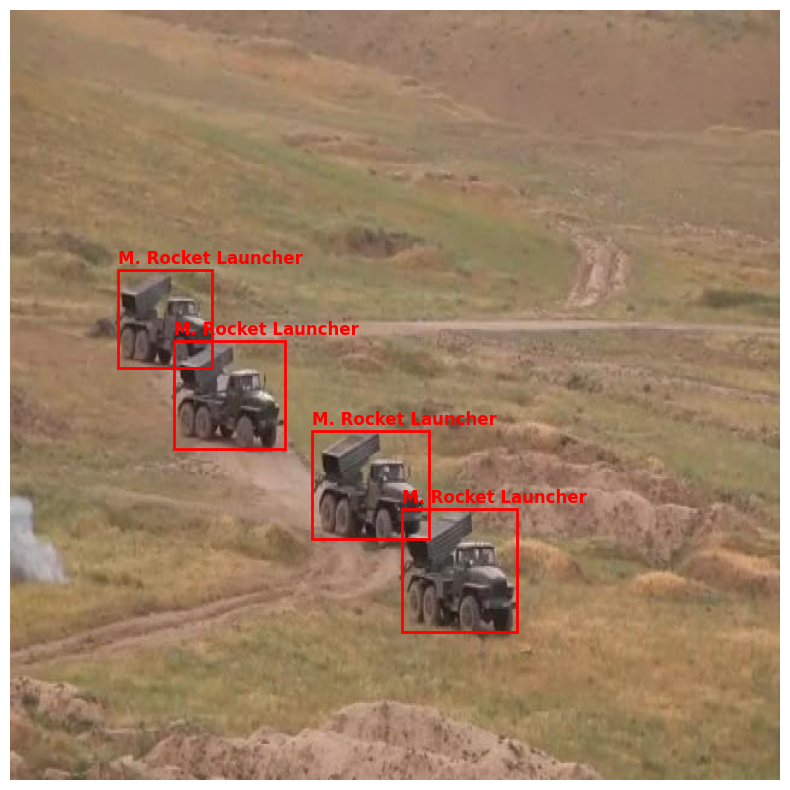

In [27]:
# -----------------------------
# 7️⃣ Visualize Bounding Boxes (Optional)
# -----------------------------
def visualize_bbox(image_path, label_path):
    img = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    
    w, h = img.size
    
    if label_path.exists():
        with open(label_path, "r") as f:
            for line in f.readlines():
                cls, x_center, y_center, bw, bh = map(float, line.strip().split())
                
                # Convert normalized coordinates to pixel coordinates
                x1 = (x_center - bw/2) * w
                y1 = (y_center - bh/2) * h
                x2 = (x_center + bw/2) * w
                y2 = (y_center + bh/2) * h
                
                plt.gca().add_patch(plt.Rectangle(
                    (x1, y1), x2-x1, y2-y1,
                    edgecolor='red', facecolor='none', linewidth=2
                ))
                plt.text(x1, y1-5, class_names[int(cls)], color='red', fontsize=12, weight='bold')
    
    plt.axis("off")
    plt.show()

# Example visualization
if train_label_files:
    img_example = train_images / (train_label_files[55].stem + ".jpeg")
    visualize_bbox(img_example, train_label_files[55])


Number of training images found: 1360
Showing: image_s3r2_kiit_589.jpeg


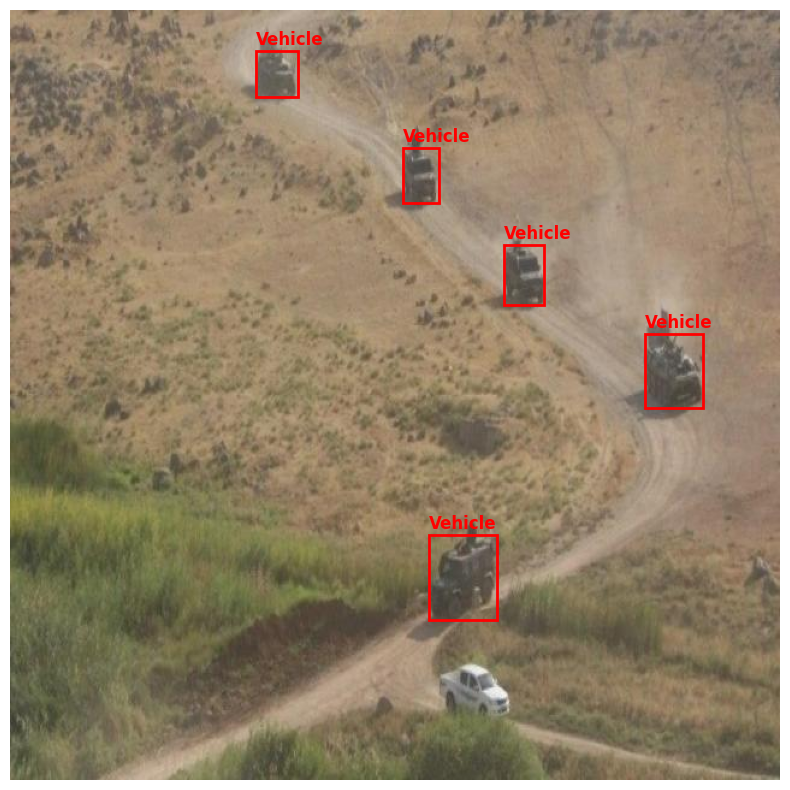

Showing: image_s3r2_kiit_131.jpeg


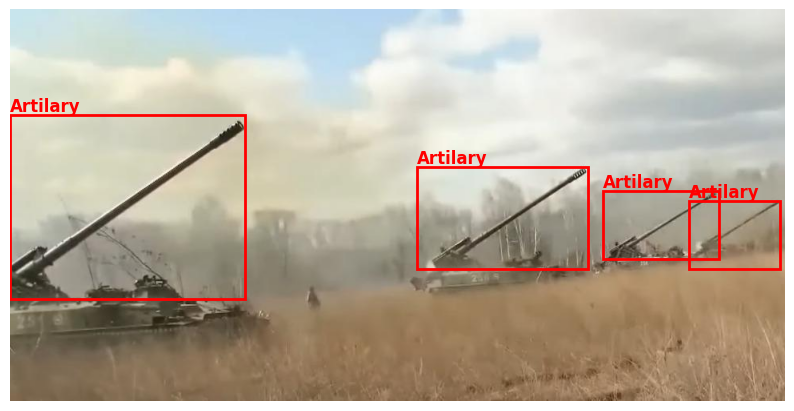

Showing: image_s3r2_kiit_1275.jpeg


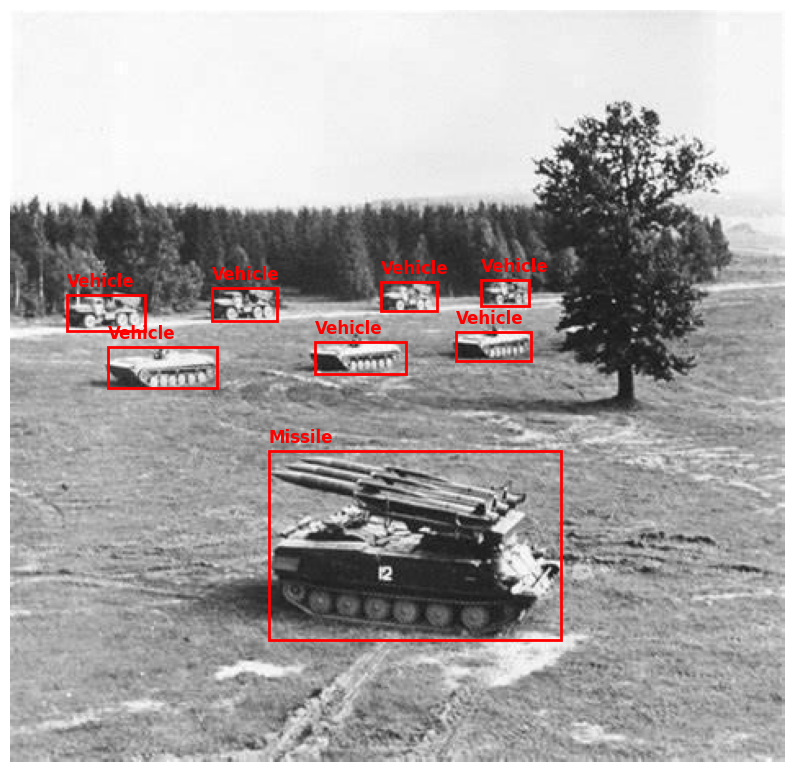

Showing: image_s3r2_kiit_180.jpeg


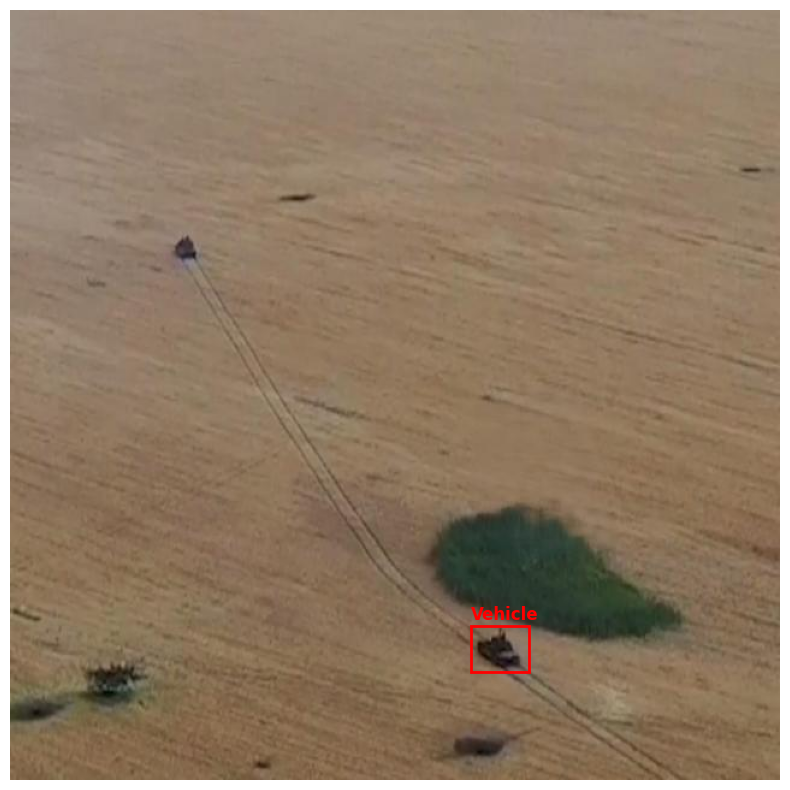

Showing: image_s3r2_kiit_615.jpeg


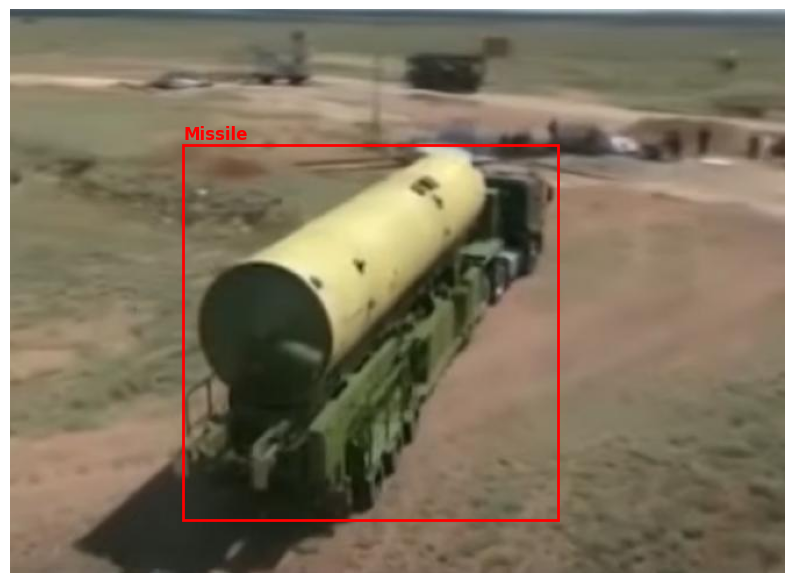

In [32]:
# -----------------------------
# 7️⃣ Visualize Bounding Boxes for Random Images (Fixed)
# -----------------------------
train_image_files = list(train_images.glob("*.jpg")) + list(train_images.glob("*.jpeg"))
train_label_files = list(train_labels.glob("*.txt"))

print("Number of training images found:", len(train_image_files))

num_images = 5
num_images = min(num_images, len(train_image_files))
random_indices = random.sample(range(len(train_image_files)), num_images)

class_names = ["Artilary", "Missile", "Radar", "M. Rocket Launcher", "Soldier", "Tank", "Vehicle"]

def visualize_bbox(image_path, label_path):
    img = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    
    w, h = img.size
    
    if label_path.exists():
        with open(label_path, "r") as f:
            for line in f.readlines():
                cls, x_center, y_center, bw, bh = map(float, line.strip().split())
                
                x1 = (x_center - bw/2) * w
                y1 = (y_center - bh/2) * h
                x2 = (x_center + bw/2) * w
                y2 = (y_center + bh/2) * h
                
                plt.gca().add_patch(plt.Rectangle(
                    (x1, y1), x2-x1, y2-y1,
                    edgecolor='red', facecolor='none', linewidth=2
                ))
                plt.text(x1, y1-5, class_names[int(cls)], color='red', fontsize=12, weight='bold')
    
    plt.axis("off")
    plt.show()

for idx in random_indices:
    img_file = train_image_files[idx]
    label_file = train_labels / (img_file.stem + ".txt")
    print(f"Showing: {img_file.name}")
    visualize_bbox(img_file, label_file)


# yml - file

In [1]:
from pathlib import Path

# Path to your YAML file
yaml_file = Path("/kaggle/input/kiit-mita/KIIT-MiTA/KIIT-MiTA.yml")

# Check if file exists
if yaml_file.exists():
    print(f"YAML file found: {yaml_file}\n")
else:
    print("YAML file not found!")
    yaml_file = None

# Read and print the contents
if yaml_file:
    with open(yaml_file, "r") as f:
        content = f.read()
    print("YAML file content:\n")
    print(content)


YAML file found: /kaggle/input/kiit-mita/KIIT-MiTA/KIIT-MiTA.yml

YAML file content:

names:
  - Artilary
  - Missile
  - Radar
  - M. Rocket Launcher
  - Soldier
  - Tank
  - Vehicle
nc: 7
train: /train/images
val: /test/images
test: /valid/images


# <mark> YOLO 26 Model

## Install Ultralytics

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.9 MB/s eta 0:00:0000:01


## 🔧 Correcting Dataset YAML Paths for YOLO Training

In [4]:
from pathlib import Path
import yaml

data_config = {
    "names": [
        "Artilary",
        "Missile",
        "Radar",
        "M. Rocket Launcher",
        "Soldier",
        "Tank",
        "Vehicle"
    ],
    "nc": 7,
    "train": "/kaggle/input/kiit-mita/KIIT-MiTA/train/images",
    "val": "/kaggle/input/kiit-mita/KIIT-MiTA/valid/images",
    "test": "/kaggle/input/kiit-mita/KIIT-MiTA/test/images"
}

yaml_path = Path("/kaggle/working/KIIT_MiTA_fixed.yaml")

with open(yaml_path, "w") as f:
    yaml.dump(data_config, f)

print("New YAML file created at:", yaml_path)

New YAML file created at: /kaggle/working/KIIT_MiTA_fixed.yaml


## Model Training - YOLO26nano

In [5]:
from ultralytics import YOLO

model = YOLO("yolo26n.pt")
model.train(
    data="/kaggle/working/KIIT_MiTA_fixed.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    project="KIIT_MiTA_YOLO26_nano", 
    name="yolo26_nano_train",
    exist_ok=True   
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/KIIT_MiTA_fixed.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo26_nano_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7968b45c76e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

## Model Complexity (Parameters + FLOPs)

In [6]:
!pip install thop

In [12]:
# ---------------------------------------
# 📊 Model Complexity: Params & FLOPs
# ---------------------------------------

from ultralytics import YOLO
from thop import profile
import torch

# Load trained model
model = YOLO("/kaggle/working/runs/detect/KIIT_MiTA_YOLO26_nano/yolo26_nano_train/weights/best.pt")

# Get raw PyTorch model
pt_model = model.model

# Total Parameters
total_params = sum(p.numel() for p in pt_model.parameters())

print(f"Total Parameters: {total_params:,}")

# Get correct device
device = next(pt_model.parameters()).device

# FLOPs estimation
dummy_input = torch.randn(1, 3, 640, 640).to(device)

flops, params = profile(pt_model, inputs=(dummy_input,), verbose=False)

print(f"FLOPs: {flops / 1e9:.2f} GFLOPs")


Total Parameters: 2,506,530
FLOPs: 2.89 GFLOPs


## Visualizing YOLO Training Outputs

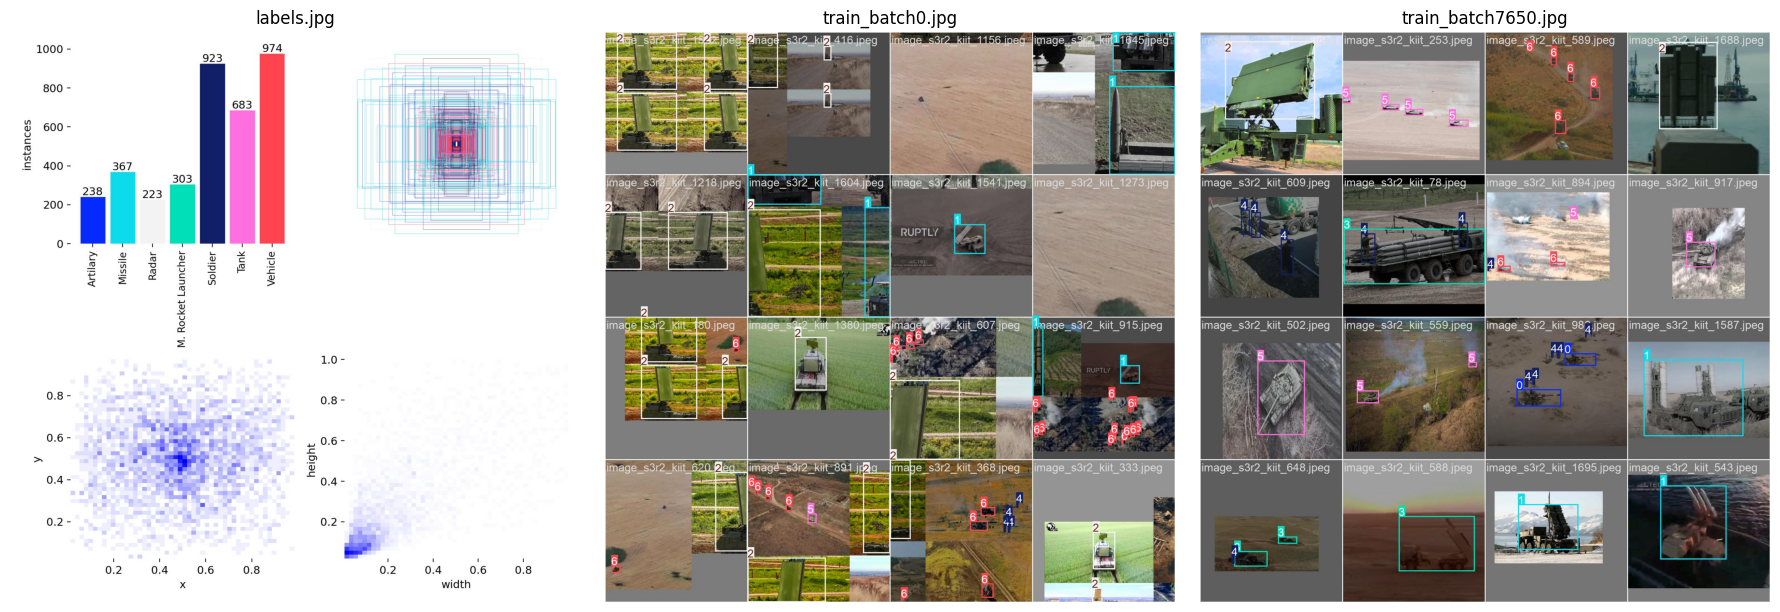

In [14]:
# ---------------------------------------
# 📸 Visualizing YOLO Training Outputs
# ---------------------------------------

import matplotlib.pyplot as plt
import cv2
import os

# Define paths
base_path = "/kaggle/working/runs/detect/KIIT_MiTA_YOLO26_nano/yolo26_nano_train"

images_to_plot = [
    "labels.jpg",
    "train_batch0.jpg",
    "train_batch7650.jpg"
]

plt.figure(figsize=(18,6))

for i, img_name in enumerate(images_to_plot):
    img_path = os.path.join(base_path, img_name)
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


# Confusion Matrix

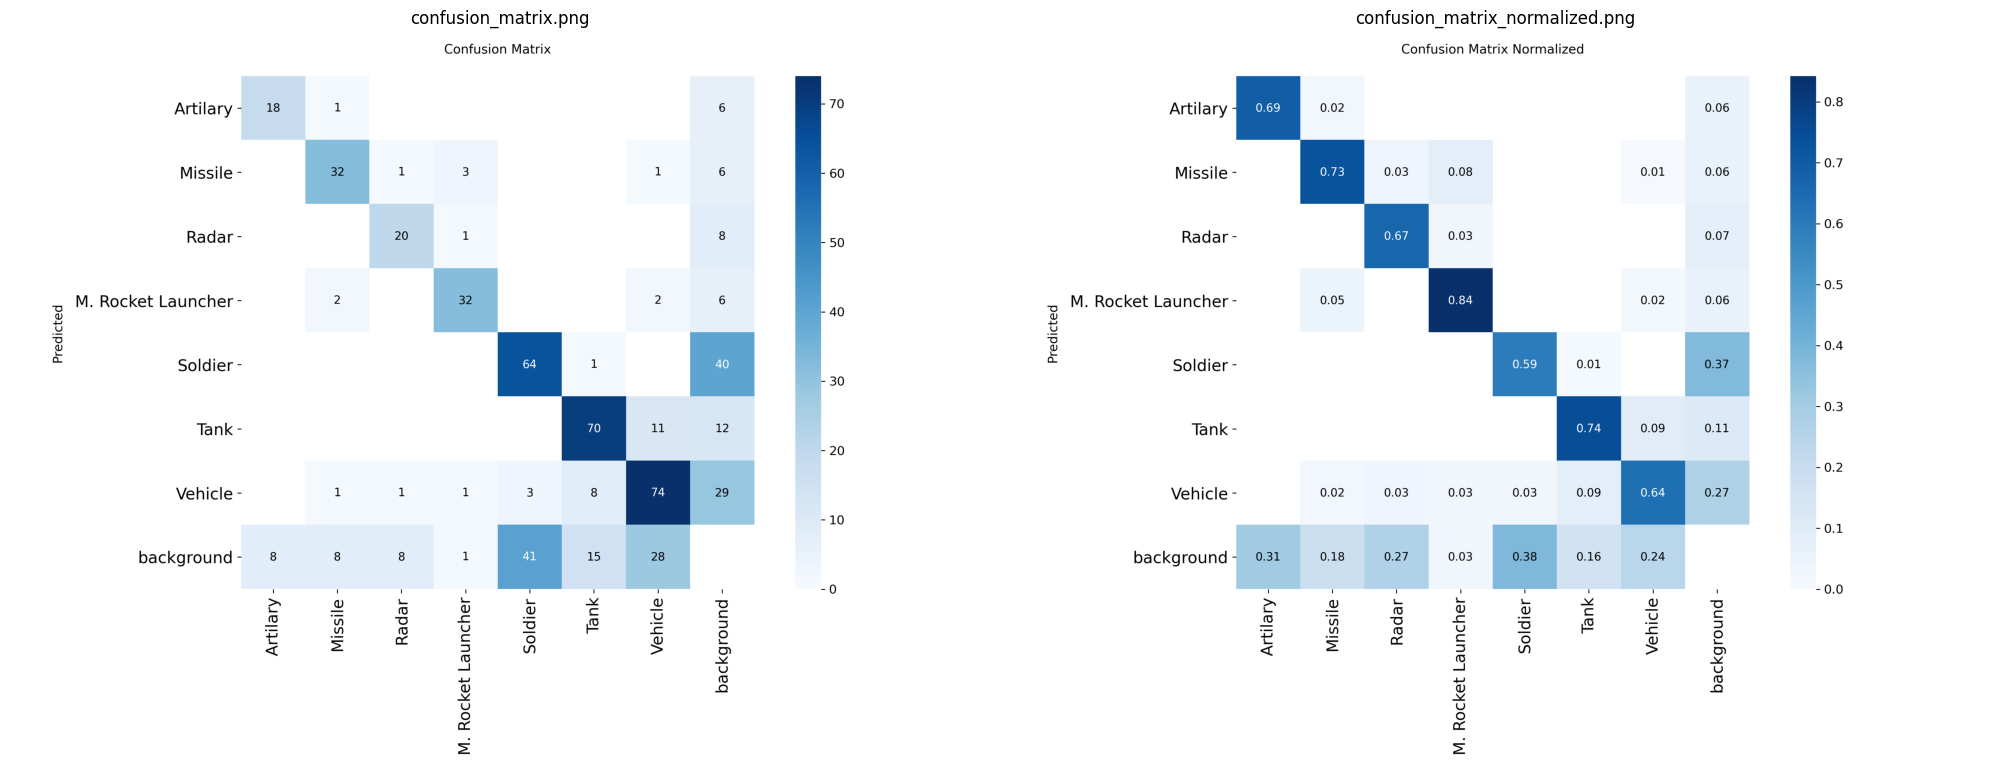

In [22]:
# ---------------------------------------
# 📸 Visualizing YOLO Training Outputs
# ---------------------------------------

import matplotlib.pyplot as plt
import cv2
import os

# Define paths
base_path = "/kaggle/working/runs/detect/KIIT_MiTA_YOLO26_nano/yolo26_nano_train"

images_to_plot = [
    "confusion_matrix.png",
    "confusion_matrix_normalized.png"
]

plt.figure(figsize=(30,15))

for i, img_name in enumerate(images_to_plot):
    img_path = os.path.join(base_path, img_name)
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


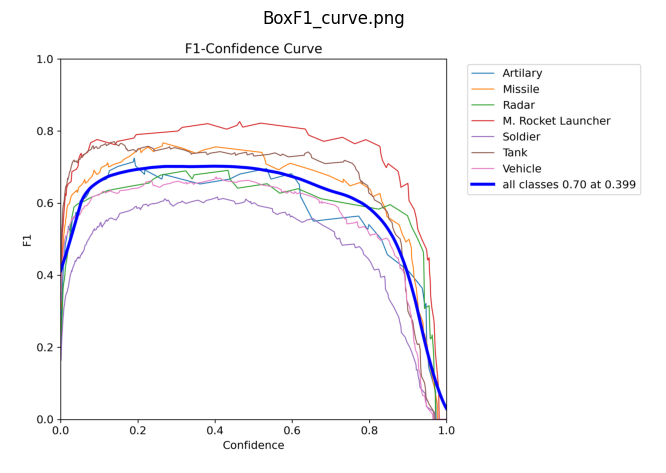

In [16]:
# ---------------------------------------
# 📸 Visualizing YOLO Training Outputs
# ---------------------------------------

import matplotlib.pyplot as plt
import cv2
import os

# Define paths
base_path = "/kaggle/working/runs/detect/KIIT_MiTA_YOLO26_nano/yolo26_nano_train"

images_to_plot = [
    "BoxF1_curve.png"
]

plt.figure(figsize=(20,8))

for i, img_name in enumerate(images_to_plot):
    img_path = os.path.join(base_path, img_name)
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


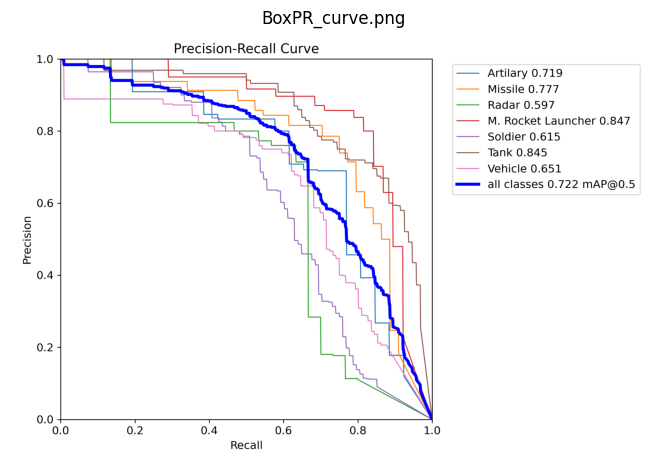

In [17]:
# ---------------------------------------
# 📸 Visualizing YOLO Training Outputs
# ---------------------------------------

import matplotlib.pyplot as plt
import cv2
import os

# Define paths
base_path = "/kaggle/working/runs/detect/KIIT_MiTA_YOLO26_nano/yolo26_nano_train"

images_to_plot = [
    "BoxPR_curve.png"
]

plt.figure(figsize=(20,8))

for i, img_name in enumerate(images_to_plot):
    img_path = os.path.join(base_path, img_name)
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


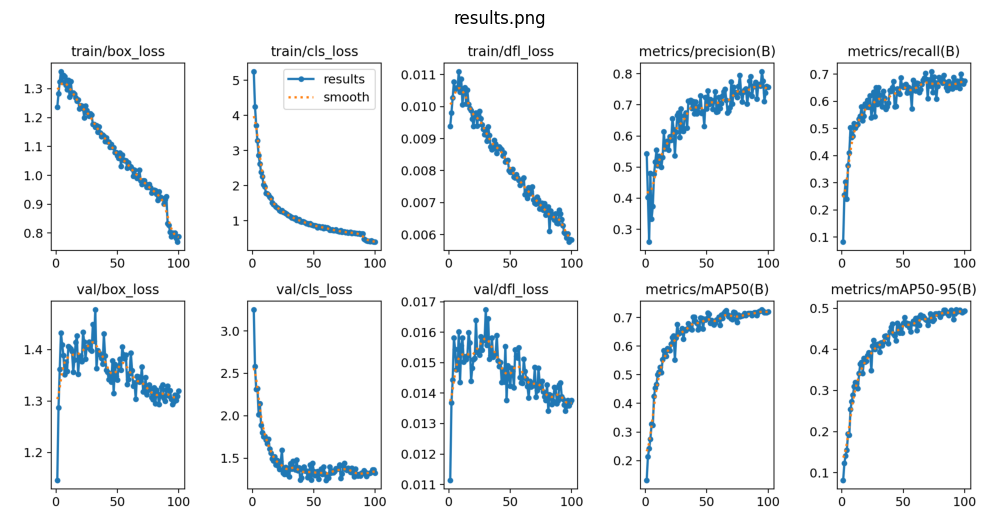

In [28]:
# ---------------------------------------
# 📸 Visualizing YOLO Training Outputs
# ---------------------------------------

import matplotlib.pyplot as plt
import cv2
import os

# Define paths
base_path = "/kaggle/working/runs/detect/KIIT_MiTA_YOLO26_nano/yolo26_nano_train"

images_to_plot = [
    "results.png"
]

plt.figure(figsize=(30,15))

for i, img_name in enumerate(images_to_plot):
    img_path = os.path.join(base_path, img_name)
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


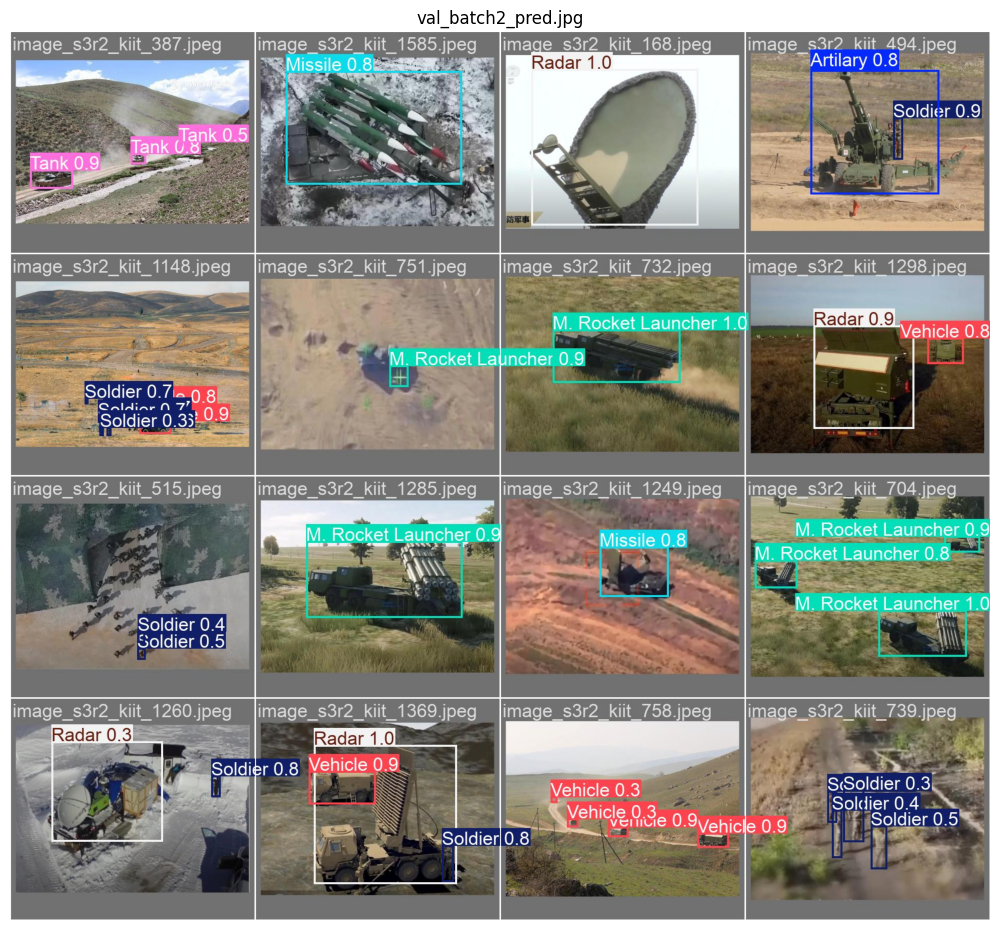

In [29]:
# ---------------------------------------
# 📸 Visualizing YOLO Training Outputs
# ---------------------------------------

import matplotlib.pyplot as plt
import cv2
import os

# Define paths
base_path = "/kaggle/working/runs/detect/KIIT_MiTA_YOLO26_nano/yolo26_nano_train"

images_to_plot = [
    "val_batch2_pred.jpg"
]

plt.figure(figsize=(30,15))

for i, img_name in enumerate(images_to_plot):
    img_path = os.path.join(base_path, img_name)
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()
